<h1><I>Import packages/Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
import statsmodels.api as sm


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<h1><I>Data Exploration

In [2]:
data = pd.read_csv('/content/CAR DETAILS FROM CAR DEKHO.csv')
data.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


As we can see there are no null values in the dataset.

In [4]:
#checking the categorical values 

In [5]:
cat_col = [col for col in data.columns if data[col].dtypes=='object']
cat_col

['name', 'fuel', 'seller_type', 'transmission', 'owner']

In [6]:
num_col = [col for col in data.columns if data[col].dtypes!='object']
num_col

['year', 'selling_price', 'km_driven']


fuel  :  5
**************************************************


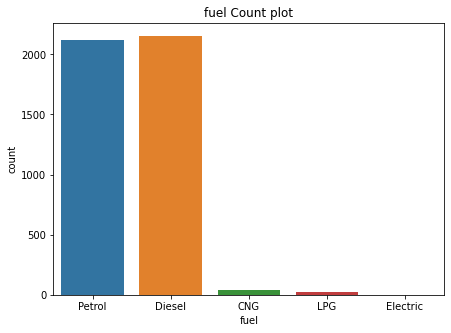


seller_type  :  3
**************************************************


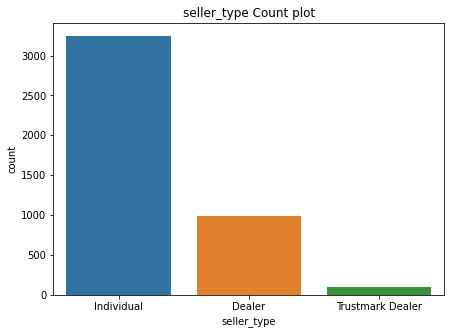


transmission  :  2
**************************************************


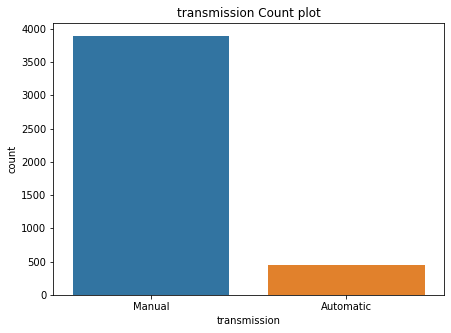


owner  :  5
**************************************************


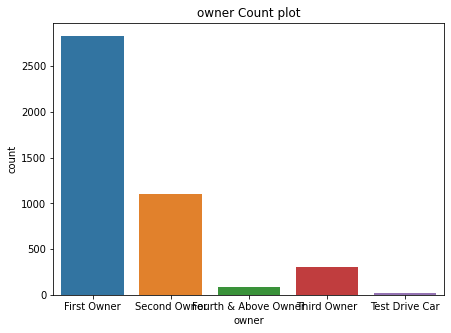

In [7]:
#This will show us if all the categories are sensible.
import warnings
warnings.filterwarnings('ignore')
for col in cat_col:
  if col != 'name':
    print()
    print(col,' : ',len(data[col].unique()))
    print('*'*50)
    plt.figure(figsize=(7,5))
    sns.countplot(data[col])
    plt.title(col + ' Count plot')
    plt.show()

fuel : fuel column is quite balanced. But all other categorical columns are not. 

<h2><I>Numerical columns overview

In [8]:
data[num_col].describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


**year** : year is normaly distributed, as there is very  little difference between mean and median(50%)<br>
**selling price** : mean = 504127.3, median = 350000.0 there is a substantial difference in mean and median hence we need some modification over that.<br>
**km_driven** : This is too normally distibuted.


<h2><I>Analyzing numerical columns

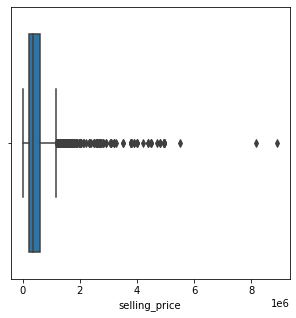

In [9]:
plt.figure(figsize=(5,5))
sns.boxplot(data['selling_price'])
plt.show()

Here we can clearly see that selling price has lots of outliers data. Hence our hypothesis is true.

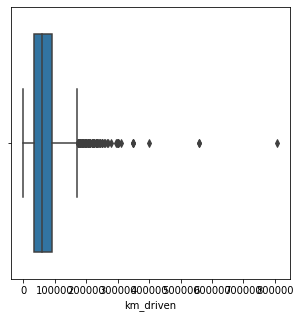

In [10]:
plt.figure(figsize=(5,5))
sns.boxplot(data['km_driven'])
plt.show()

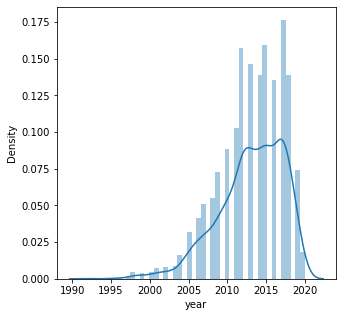

In [11]:
plt.figure(figsize=(5,5))
sns.distplot(data['year'])
plt.show()

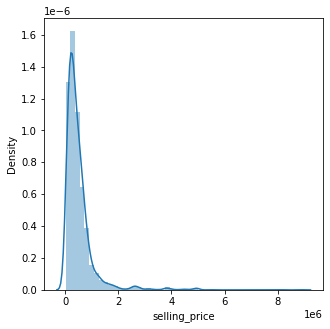

In [12]:
plt.figure(figsize=(5,5))
sns.distplot(data['selling_price'])
plt.show()

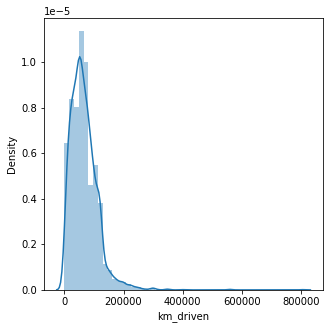

In [13]:
plt.figure(figsize=(5,5))
sns.distplot(data['km_driven'])
plt.show()

In [14]:
q1 = np.quantile(data['selling_price'],0.25)
q2 = np.quantile(data['selling_price'],0.5)
q3 = np.quantile(data['selling_price'],0.75)
data['selling_price'][(data['selling_price']<q1)].shape
#data['selling_price'][(data['selling_price']>q3)].shape

(1085,)

In [15]:
q1,q2,q3

(208749.75, 350000.0, 600000.0)

<h2><I>Using log transformation on the selling price and km_driven columns

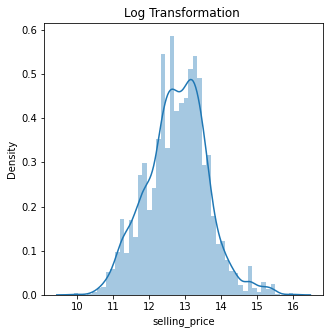

In [16]:
plt.figure(figsize=(5,5))
sns.distplot(np.log(data['selling_price']))
plt.title('Log Transformation ')
plt.show()

Now, we can see how the transformation happened. The initial distribution was right skewed.


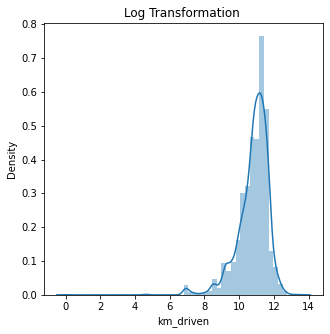

In [17]:
plt.figure(figsize=(5,5))
sns.distplot(np.log(data['km_driven']))
plt.title('Log Transformation ')
plt.show()

After applying log transformation on km_driven , we got a left skewed distribution. We will try power transformation using sqrt.

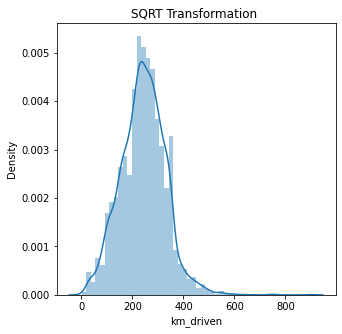

In [18]:
plt.figure(figsize=(5,5))
sns.distplot(np.sqrt(data['km_driven']))
plt.title('SQRT Transformation ')
plt.show()

Now we got what we wanted. <br>
<h4>Conclusion:<br></h4>
1. selling_price : we will apply log transformation.<br>
2. km_driven : SQRT Transformation


In [19]:
data['selling_price'] = np.log(data['selling_price'])
data['km_driven'] = np.sqrt(data['km_driven'])

<h3><I>Year

In [20]:
data['year'].describe()

count    4340.000000
mean     2013.090783
std         4.215344
min      1992.000000
25%      2011.000000
50%      2014.000000
75%      2016.000000
max      2020.000000
Name: year, dtype: float64

In [21]:
how_old = 2021 - data['year']

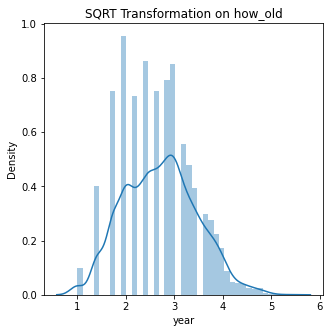

In [22]:
plt.figure(figsize=(5,5))
sns.distplot(np.sqrt(how_old))
plt.title('SQRT Transformation on how_old')
plt.show()

In [23]:
data['how_old'] = np.sqrt(how_old)

In [24]:
data_c = data.copy()
data_c.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,how_old
0,Maruti 800 AC,2007,11.002100,264.575131,Petrol,Individual,Manual,First Owner,3.741657
1,Maruti Wagon R LXI Minor,2007,11.813030,223.606798,Petrol,Individual,Manual,First Owner,3.741657
2,Hyundai Verna 1.6 SX,2012,13.304685,316.227766,Diesel,Individual,Manual,First Owner,3.000000
3,Datsun RediGO T Option,2017,12.429216,214.476106,Petrol,Individual,Manual,First Owner,2.000000
4,Honda Amaze VX i-DTEC,2014,13.017003,375.499667,Diesel,Individual,Manual,Second Owner,2.645751


<h3><I>Name

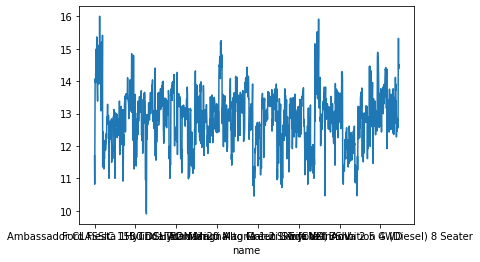

In [25]:
data_c.groupby('name')['selling_price'].mean().plot()

<h1><I>Data Vectorization

<h3><I>Categorical vectorization

In [26]:
data_c['fuel'].unique()

array(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'], dtype=object)

In [27]:
data_c['fuel_petrol'] = np.where(data_c['fuel']=='Petrol',1,0)
data_c['fuel_diesel'] = np.where(data_c['fuel']=='Diesel',1,0)
data_c['fuel_cng'] = np.where(data_c['fuel']=='CNG',1,0)
data_c['fuel_lpg'] = np.where(data_c['fuel']=='LPG',1,0)
data_c['fuel_electric'] = np.where(data_c['fuel']=='Electric',1,0)

In [28]:
data_c.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,how_old,fuel_petrol,fuel_diesel,fuel_cng,fuel_lpg,fuel_electric
0,Maruti 800 AC,2007,11.002100,264.575131,Petrol,Individual,Manual,First Owner,3.741657,1,0,0,0,0
1,Maruti Wagon R LXI Minor,2007,11.813030,223.606798,Petrol,Individual,Manual,First Owner,3.741657,1,0,0,0,0
2,Hyundai Verna 1.6 SX,2012,13.304685,316.227766,Diesel,Individual,Manual,First Owner,3.000000,0,1,0,0,0
3,Datsun RediGO T Option,2017,12.429216,214.476106,Petrol,Individual,Manual,First Owner,2.000000,1,0,0,0,0
4,Honda Amaze VX i-DTEC,2014,13.017003,375.499667,Diesel,Individual,Manual,Second Owner,2.645751,0,1,0,0,0


In [29]:
data_c['seller_type'].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [30]:
data_c['Individual_vec'] = np.where(data_c['seller_type']=='Individual',1,0)
data_c['Dealer_vec'] = np.where(data_c['seller_type']=='Dealer',1,0)
data_c['Trustmark_Dealer_vec'] = np.where(data_c['seller_type']=='Trustmark Dealer',1,0)

In [31]:
data_c['transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [32]:
data_c['Manual_vec'] = np.where(data_c['transmission']=='Manual',1,0)
data_c['Automatic_vec'] = np.where(data_c['transmission']=='Automatic',1,0)

In [33]:
data_c['owner'].unique()

array(['First Owner', 'Second Owner', 'Fourth & Above Owner',
       'Third Owner', 'Test Drive Car'], dtype=object)

In [34]:
data_c['First_Owner_vec'] = np.where(data_c['owner']=='First Owner',1,0)
data_c['Second_Owner_vec'] = np.where(data_c['owner']=='Second Owner',1,0)
data_c['Fourth_Above_Owner_vec'] = np.where(data_c['owner']=='Fourth & Above Owner',1,0)
data_c['Third_Owner_vec'] = np.where(data_c['owner']=='Third Owner',1,0)
data_c['Test_Drive_Car_vec'] = np.where(data_c['owner']=='Test Drive Car',1,0)

In [35]:
def separate(val):
  return val.split([' '][0][0])

In [36]:
data_c['name'].apply(separate)[0][0]

'Maruti'

In [37]:
data_c['names'] = pd.Series([val.split(' ')[0] for val in data_c['name'].values])

In [38]:
data_c.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,how_old,fuel_petrol,fuel_diesel,fuel_cng,fuel_lpg,fuel_electric,Individual_vec,Dealer_vec,Trustmark_Dealer_vec,Manual_vec,Automatic_vec,First_Owner_vec,Second_Owner_vec,Fourth_Above_Owner_vec,Third_Owner_vec,Test_Drive_Car_vec,names
0,Maruti 800 AC,2007,11.002100,264.575131,Petrol,Individual,Manual,First Owner,3.741657,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,Maruti
1,Maruti Wagon R LXI Minor,2007,11.813030,223.606798,Petrol,Individual,Manual,First Owner,3.741657,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,Maruti
2,Hyundai Verna 1.6 SX,2012,13.304685,316.227766,Diesel,Individual,Manual,First Owner,3.000000,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,Hyundai
3,Datsun RediGO T Option,2017,12.429216,214.476106,Petrol,Individual,Manual,First Owner,2.000000,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,Datsun
4,Honda Amaze VX i-DTEC,2014,13.017003,375.499667,Diesel,Individual,Manual,Second Owner,2.645751,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,Honda


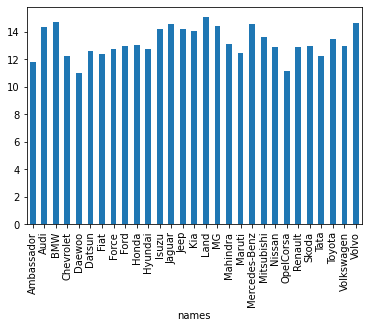

In [39]:
data_c.groupby('names')['selling_price'].mean().plot.bar()

We can see it is very difficult to distinguish among the cars based on their names. So I will be dropping the column along with all the categorical values.

In [40]:
data_c.drop(['year','name','names','fuel','seller_type','transmission','owner','names'], axis=1, inplace=True)
data_c.head(5)

,selling_price,km_driven,how_old,fuel_petrol,fuel_diesel,fuel_cng,fuel_lpg,fuel_electric,Individual_vec,Dealer_vec,Trustmark_Dealer_vec,Manual_vec,Automatic_vec,First_Owner_vec,Second_Owner_vec,Fourth_Above_Owner_vec,Third_Owner_vec,Test_Drive_Car_vec
0,11.002100,264.575131,3.741657,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0
1,11.813030,223.606798,3.741657,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0
2,13.304685,316.227766,3.000000,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0
3,12.429216,214.476106,2.000000,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0
4,13.017003,375.499667,2.645751,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0


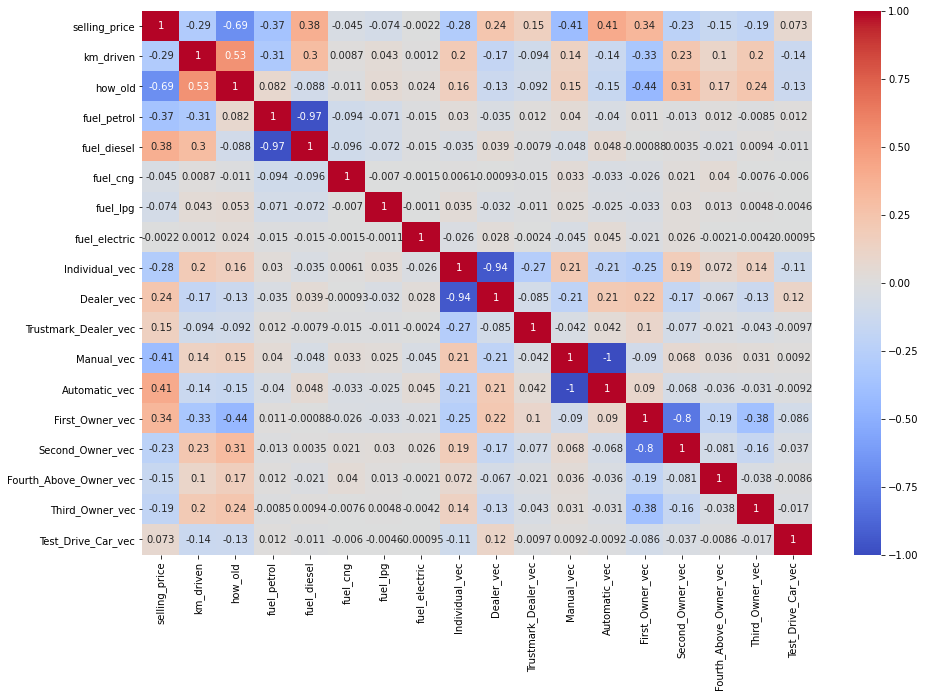

In [62]:
plt.figure(figsize=(15,10))
sns.heatmap(data_c.corr(),annot=True,cmap='coolwarm')
plt.show()

<h1><I>Data Split

In [41]:
X_data = data_c.drop('selling_price',axis=1)
Y_data = data_c['selling_price']

In [42]:
from sklearn.model_selection import  train_test_split
X,x,Y,y = train_test_split(X_data, Y_data, test_size=0.25, random_state=56)

In [43]:
print(X.shape,x.shape)

(3255, 17) (1085, 17)


In [44]:
print(Y.shape,y.shape)

(3255,) (1085,)


<h1><I>Model training

In [45]:
max_col_values = [data_c[col].max() for col in data_c.columns]
min_col_values = [data_c[col].min() for col in data_c.columns]

In [46]:
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler()
X_norm = norm.fit_transform(X)

In [47]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()

In [48]:
LR.fit(X_norm,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [49]:
LR.coef_

array([-7.61474968e-02, -2.77800713e+00, -9.25314681e-02,  4.57511055e-01,
       -1.62505604e-01, -1.73816029e-01, -2.86579545e-02, -2.19898842e-01,
       -4.85070984e-02,  2.68405940e-01, -4.04432455e-01,  4.04432455e-01,
        7.97314038e-02,  3.87703885e-02, -8.34098986e-02, -3.60464363e-02,
        9.54542555e-04])

In [50]:
LR.intercept_


14.123597298747608

In [51]:
x = norm.transform(x)

In [52]:
LR.score(x,y)

0.6790069429403474

In [53]:
mod = sm.OLS(Y,X_norm)
mod.fit()

In [54]:
print(mod.fit().summary())

                            OLS Regression Results                            
Dep. Variable:          selling_price   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     551.8
Date:                Mon, 30 Aug 2021   Prob (F-statistic):               0.00
Time:                        21:20:04   Log-Likelihood:                -2122.4
No. Observations:                3255   AIC:                             4273.
Df Residuals:                    3241   BIC:                             4358.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0761      0.095     -0.806      0.4

Conclusions : P values for each column is less than 0.05 except the feature x1 which is km_driven. The newly created column 'how_old' is found out to be a very important negative feature which has a coefficient value of -2.7780 which is among top 5 of the absolute values of coefficients. Trustworthyness of the seller, Manual and automatic plays the most crucial role in the price of the car.

In [55]:
y_pred = LR.predict(x)

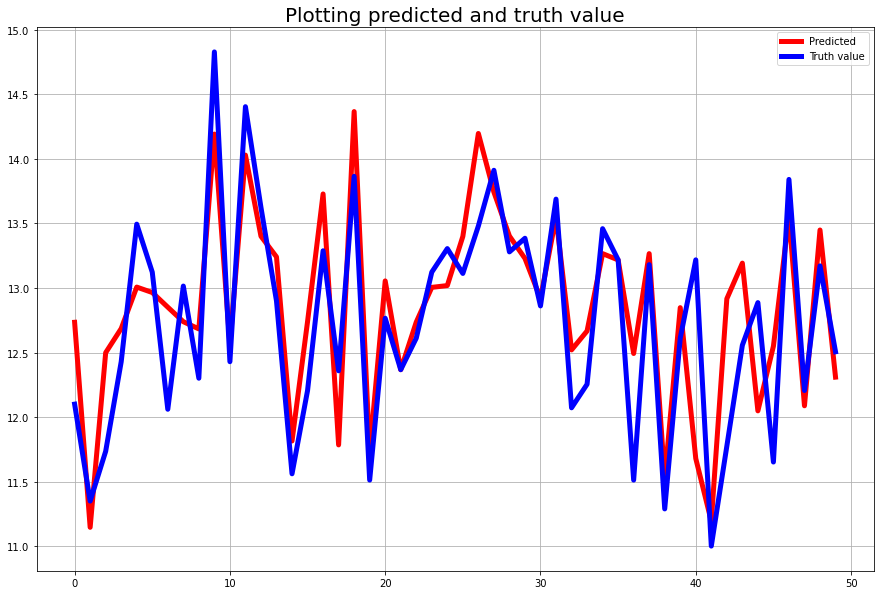

In [65]:
plt.figure(figsize=(15,10))
plt.plot(range(0,50),y_pred[0:50], color='red',linewidth=5)
plt.plot(range(0,50),y[0:50], color='blue',linewidth=5)
plt.title('Plotting predicted and truth value', fontsize=20)
plt.legend(['Predicted','Truth value'])
plt.grid(True)
plt.show()

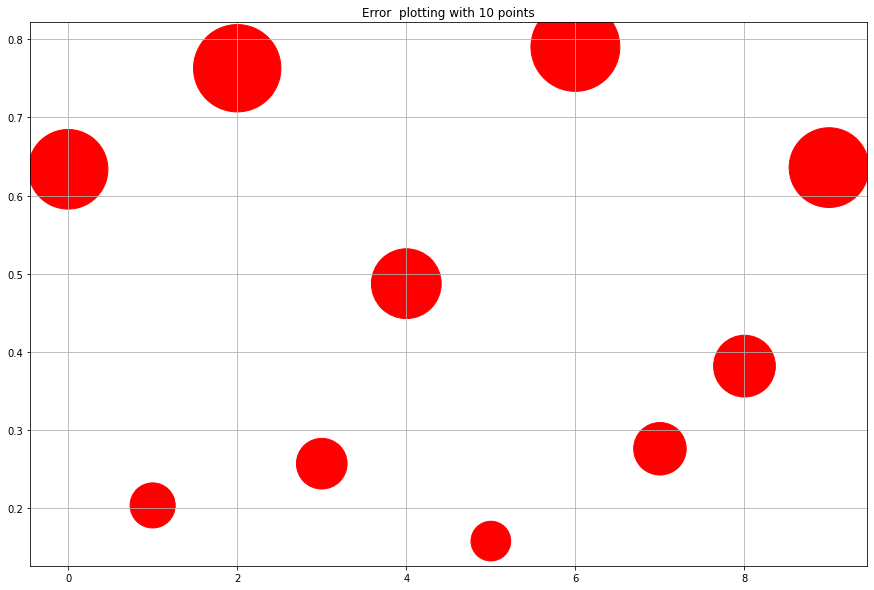

In [57]:
si = [abs(i-j)*10000 for i,j in zip(y_pred[0:10],y[0:10])]
s = [abs(i-j) for i,j in zip(y_pred[0:10],y[0:10])]
plt.figure(figsize=(15,10))
plt.scatter(range(0,10),s, color='red',s=si)
plt.title('Error  plotting with 10 points')
plt.grid(True)
plt.show()

<h1><I>Ridge and Lasso regression

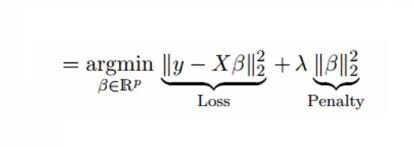

Train R2 score for alpha = 10000:  0.09505698773769922
Test R2 score for alpha = 10000 :  0.09601567099656484
Train R2 score for alpha = 1000:  0.3730191272738409
Test R2 score for alpha = 1000 :  0.3776217707797591
Train R2 score for alpha = 100:  0.6087669587367742
Test R2 score for alpha = 100 :  0.5979921560553391
Train R2 score for alpha = 10:  0.6849206451621845
Test R2 score for alpha = 10 :  0.6723883250548834
Train R2 score for alpha = 1:  0.6887408364143347
Test R2 score for alpha = 1 :  0.6785489562763259
Train R2 score for alpha = 0.1:  0.6887976034834367
Test R2 score for alpha = 0.1 :  0.6789645531176739
Train R2 score for alpha = 0.01:  0.6887982012167906
Test R2 score for alpha = 0.01 :  0.6790027405451249
Train R2 score for alpha = 0.001:  0.688798207226733
Test R2 score for alpha = 0.001 :  0.6790065230695546
Train R2 score for alpha = 0.0001:  0.6887982072868654
Test R2 score for alpha = 0.0001 :  0.6790069009569583


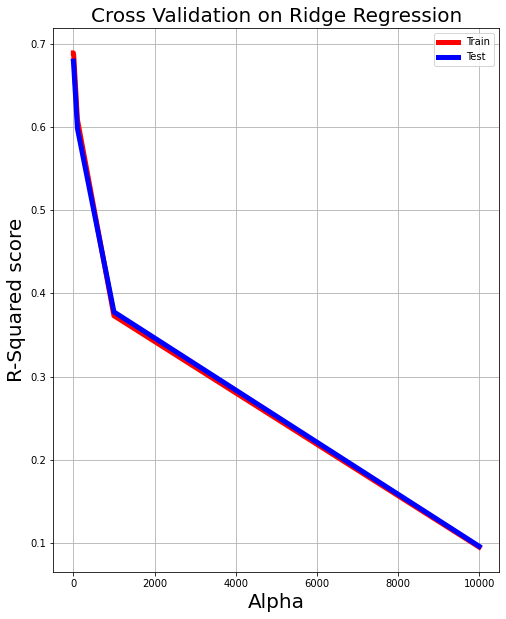

In [72]:
from sklearn.linear_model import Ridge, Lasso
alpha = [10000,1000,100,10,1,0.1,0.01,0.001,0.0001]
score_tr = []
score_val = []
for lamb in alpha:
  ridge = Ridge(alpha = lamb)
  ridge.fit(X_norm,Y)
  score_tr.append(ridge.score(X_norm,Y))
  score_val.append(ridge.score(x,y))
  print(f'Train R2 score for alpha = {lamb}: ',ridge.score(X_norm,Y))
  print(f'Test R2 score for alpha = {lamb} : ',ridge.score(x,y))

plt.figure(figsize=(8,10))
plt.plot(alpha,score_tr, color='red',linewidth='5')
plt.plot(alpha,score_val, color='blue',linewidth='5')
plt.title('Cross Validation on Ridge Regression',fontsize=20)
plt.grid(True)
plt.xlabel('Alpha',fontsize=20)
plt.ylabel('R-Squared score',fontsize=20)
plt.legend(['Train','Test'])
plt.show()




<h1><I>Lasso Regression

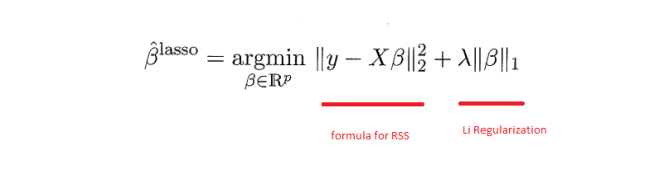

Train R2 score for alpha = 10000:  0.0
Test R2 score for alpha = 10000 :  -0.001657079721194776
Train R2 score for alpha = 1000:  0.0
Test R2 score for alpha = 1000 :  -0.001657079721194776
Train R2 score for alpha = 100:  0.0
Test R2 score for alpha = 100 :  -0.001657079721194776
Train R2 score for alpha = 10:  0.0
Test R2 score for alpha = 10 :  -0.001657079721194776
Train R2 score for alpha = 1:  0.0
Test R2 score for alpha = 1 :  -0.001657079721194776
Train R2 score for alpha = 0.1:  0.14266564559277928
Test R2 score for alpha = 0.1 :  0.1371970978003555
Train R2 score for alpha = 0.01:  0.6784783353335468
Test R2 score for alpha = 0.01 :  0.6678031326853537
Train R2 score for alpha = 0.001:  0.6883996158082688
Test R2 score for alpha = 0.001 :  0.6783276664325039
Train R2 score for alpha = 0.0001:  0.68878987442875
Test R2 score for alpha = 0.0001 :  0.6789602912129153


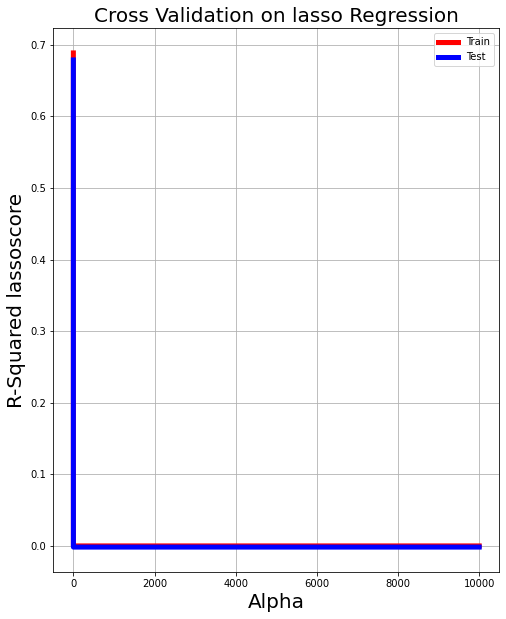

In [73]:
alpha = [10000,1000,100,10,1,0.1,0.01,0.001,0.0001]
score_tr = []
score_val = []
for lamb in alpha:
  lasso = Lasso(alpha = lamb)
  lasso.fit(X_norm,Y)
  score_tr.append(lasso.score(X_norm,Y))
  score_val.append(lasso.score(x,y))
  print(f'Train R2 score for alpha = {lamb}: ',lasso.score(X_norm,Y))
  print(f'Test R2 score for alpha = {lamb} : ',lasso.score(x,y))

plt.figure(figsize=(8,10))
plt.plot(alpha,score_tr, color='red',linewidth='5')
plt.plot(alpha,score_val, color='blue',linewidth='5')
plt.title('Cross Validation on lasso Regression',fontsize=20)
plt.grid(True)
plt.xlabel('Alpha',fontsize=20)
plt.ylabel('R-Squared lassoscore',fontsize=20)
plt.legend(['Train','Test'])
plt.show()
